In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [2]:
df = pd.read_csv("data/processed.csv",index_col=0)

In [3]:
corr = df.corr()
corr.style.background_gradient(cmap='Pastel1')

,Date,Model Year,Electric Mile Range,Number of Vehicles Registered at the Same Address,Vehicle Population,GVWR_Not Applicable,GVWR_Unknown,Vehicle Category_BS,Vehicle Category_BT,Vehicle Category_MC,Vehicle Category_MH,Vehicle Category_P,Vehicle Category_T1,Vehicle Category_T2,Vehicle Category_T3,Vehicle Category_T4,Vehicle Category_T5,Vehicle Category_T6,Vehicle Category_T7,Fuel Type_Electric,Fuel Type_Gasoline,Fuel Type_Hydrogen,Fuel Type_Natural Gas,Fuel Type_Unknown,Fuel Technology_FCEV,Fuel Technology_ICE,Fuel Technology_PHEV
Date,1.000000,0.097487,0.028807,0.073363,0.004700,0.034297,-0.060762,0.015626,0.021870,0.010580,0.007498,0.006480,-0.049819,-0.037217,-0.015671,-0.009084,0.002064,0.028801,0.010756,0.007843,-0.010995,-0.002897,0.018176,0.032482,-0.002897,-0.008979,0.012591
Model Year,0.097487,1.000000,0.115320,-0.024934,0.132031,0.060029,-0.078103,0.007778,0.028370,0.024447,-0.024187,0.075273,-0.064176,-0.000121,-0.006658,-0.018376,0.005305,-0.008054,-0.010409,0.126308,-0.122804,0.072468,0.174213,0.041083,0.072468,-0.186331,0.148556
Electric Mile Range,0.028807,0.115320,1.000000,-0.005064,0.012965,0.028422,-0.087020,-0.003331,-0.023875,-0.096757,0.003802,0.155940,-0.013247,0.025574,-0.020700,-0.018155,-0.005631,-0.007775,-0.006512,-0.205077,0.060103,0.292153,0.006436,0.000966,0.292153,0.064568,0.187536
Number of Vehicles Registered at the Same Address,0.073363,-0.024934,-0.005064,1.000000,0.010142,-0.002129,-0.008037,0.012236,0.012830,0.012288,0.010826,-0.052201,0.003398,-0.024736,-0.020213,-0.004514,0.010838,0.023165,0.011978,0.018779,-0.052981,0.003121,0.018710,0.002605,0.003121,-0.020147,0.005296
Vehicle Population,0.004700,0.132031,0.012965,0.010142,1.000000,0.077924,-0.072446,-0.042641,-0.039988,-0.020083,-0.036389,0.266837,-0.011548,0.069900,0.029368,-0.039944,-0.032889,-0.090607,-0.033137,-0.050305,0.186194,-0.009809,-0.055450,-0.008394,-0.009809,0.052883,-0.011086
GVWR_Not Applicable,0.034297,0.060029,0.028422,-0.002129,0.077924,1.000000,-0.378840,0.325224,0.304735,0.314262,0.307964,0.439154,-0.204643,-0.221993,-0.241526,-0.236463,-0.154740,-0.377273,-0.158166,0.127706,-0.074268,0.041599,0.074852,0.063000,0.041599,-0.140198,0.028596
GVWR_Unknown,-0.060762,-0.078103,-0.087020,-0.008037,-0.072446,-0.378840,1.000000,-0.123208,-0.115446,-0.119055,-0.116669,-0.166369,0.229864,0.206569,0.204845,0.207693,-0.110833,-0.033440,-0.113287,0.067089,0.015234,-0.024471,-0.078557,-0.023867,-0.024471,-0.054378,-0.004645
Vehicle Category_BS,0.015626,0.007778,-0.003331,0.012236,-0.042641,0.325224,-0.123208,1.000000,-0.052420,-0.054058,-0.052975,-0.075542,-0.066555,-0.072197,-0.078550,-0.076904,-0.050325,-0.122698,-0.051439,-0.054989,-0.021694,-0.013071,0.064085,-0.010837,-0.013071,0.063223,-0.025454
Vehicle Category_BT,0.021870,0.028370,-0.023875,0.012830,-0.039988,0.304735,-0.115446,-0.052420,1.000000,-0.050653,-0.049638,-0.070783,-0.062362,-0.067649,-0.073601,-0.072059,-0.047155,-0.114968,-0.048199,-0.013700,-0.041711,-0.012248,0.076032,-0.005110,-0.012248,0.024294,-0.023850
Vehicle Category_MC,0.010580,0.024447,-0.096757,0.012288,-0.020083,0.314262,-0.119055,-0.054058,-0.050653,1.000000,-0.051190,-0.072996,-0.064311,-0.069764,-0.075902,-0.074311,-0.048629,-0.118562,-0.049705,0.116521,0.011087,-0.012631,-0.020381,0.099904,-0.012631,-0.096412,-0.024596


In [4]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [5]:
X = df.drop(['Vehicle Population'],axis=1)

In [6]:
y = df['Vehicle Population']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [9]:
# Evaluate
y_pred = model.predict(X_test)
print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

RMSE: 4742.168877886032
R²: 0.9349729252701812


In [10]:
feature_importances = model.feature_importances_
feature_names = X_train.columns

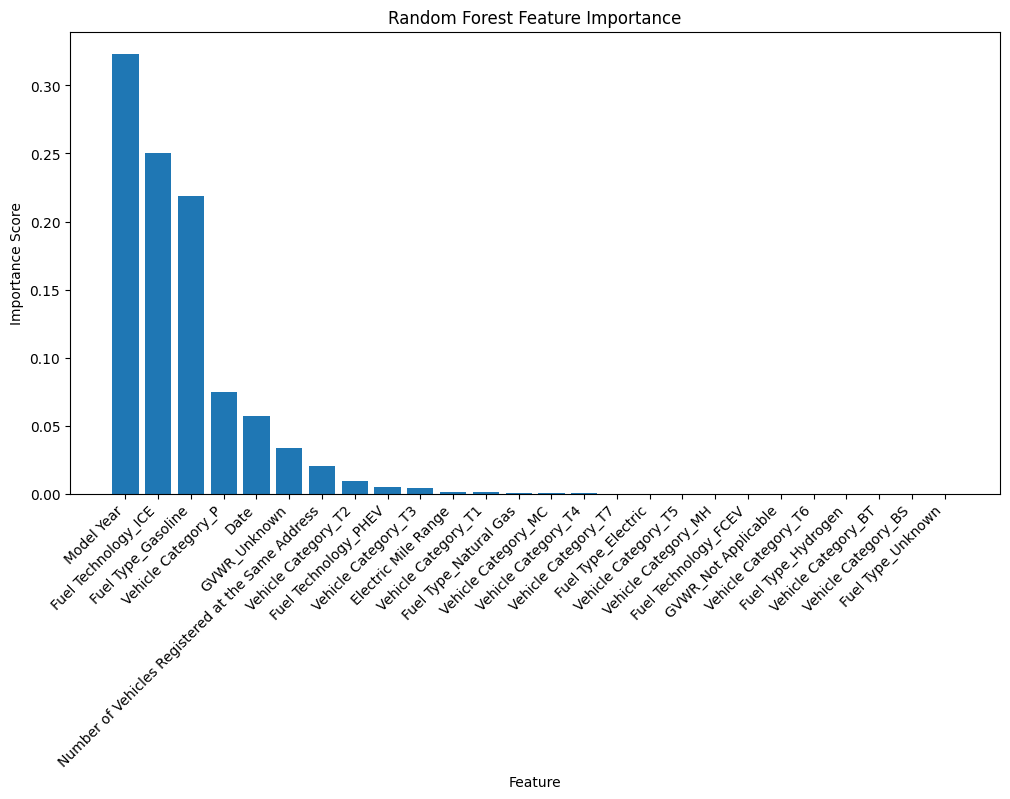

In [11]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# checking for p-values

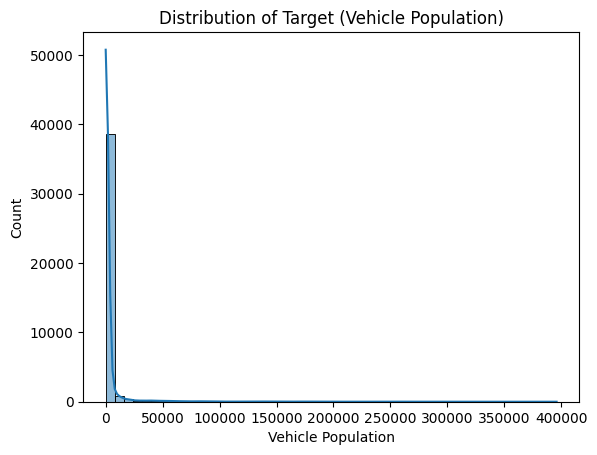

In [20]:
sns.histplot(y, bins=50, kde=True)
plt.title("Distribution of Target (Vehicle Population)")
plt.show()

In [21]:
y = np.log1p(y)

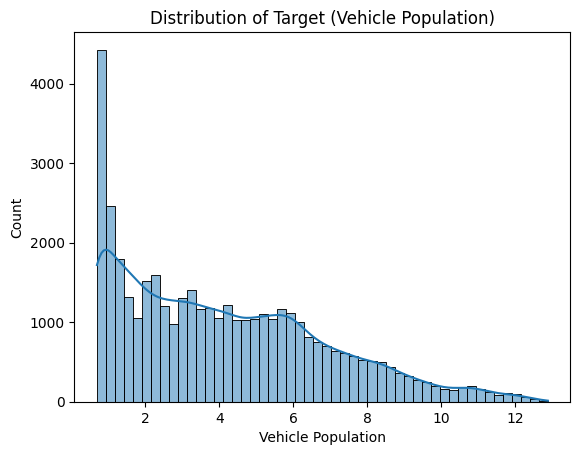

In [22]:
sns.histplot(y, bins=50, kde=True)
plt.title("Distribution of Target (Vehicle Population)")
plt.show()

In [28]:
df.to_csv("data/log-scaled.csv")